In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

In [79]:
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "12"

wd = os.getcwd()
region = "MED"
sp_temp = 'spatial'
method = 'method1'
reference  = 'W5E5'
ad_reference = 'MERRA2'

K = 273.15

In [80]:
filename = 'results/'+region.replace(' ', '')+'_divergences'+'_'+sp_temp+'_'+method+'.parquet'
divergences = pd.read_parquet(filename)

In [82]:
models_list = list(divergences.index.levels[1])
models_list.remove(ad_reference)
var_list = list(divergences.index.levels[0])
metric_list = list(divergences.columns)

In [83]:
# x-label settings for each method

# spatial method 1
r = 30 # range
hr = 15 # half-range

# spatial method 2
sp_subsets = [1,2,3,5,6,10,15,30]

# spatial method 3
sp_subset_sizes = range(1,r+1)

# temporal method 1
t_lim = 500
t_step=14
        
# temporal method 2
t_subsets = [1,5,10,15,20,25,50,100,150,200,250,300,350,400,500]

# temporal method 3
t_subset_sizes = range(1,600,10)

In [84]:
if sp_temp == 'spatial':
    if method == 'method1':
        labels = [s*2 for s in range(1,hr+1)]
        
    elif method == 'method2':
        labels = sp_subsets.copy()
        labels.reverse()

    elif method == 'method3':
        labels = sp_subset_sizes

    elif method == 'method4':
        labels = sp_subset_sizes

elif sp_temp == 'temporal':
    if method == 'method1':
        labels = [t for t in range(1,t_lim,t_step)]

    elif method == 'method2':
        labels = t_subsets.copy()

    elif method == 'method3':
        labels = t_subset_sizes

    elif method == 'method4':
        labels = t_subset_sizes

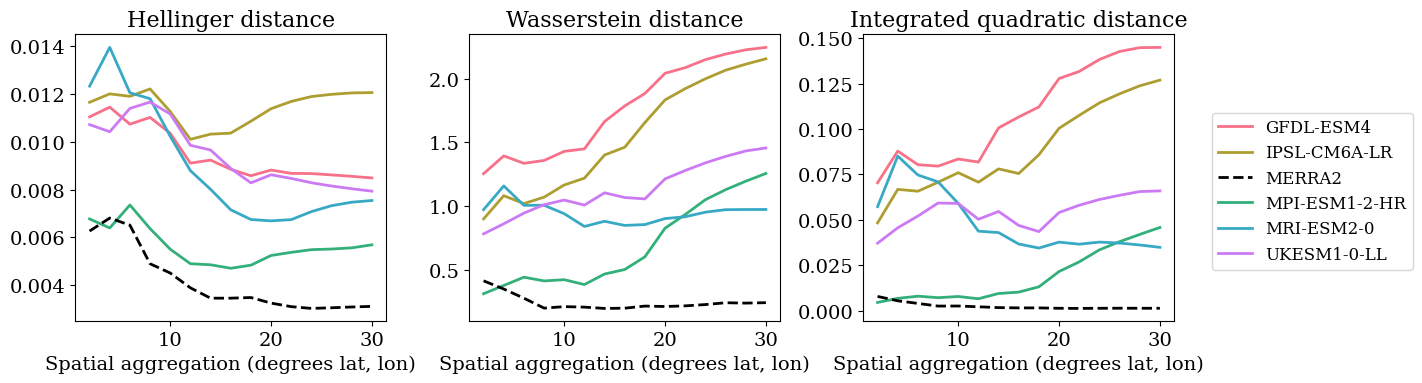

In [99]:
q = 'tasmax'
nr=1
nc = len(metric_list)
model_colours = sns.color_palette('husl', len(models_list))

fig, ax = plt.subplots(figsize=(12,4), nrows=nr, ncols=nc)

for i, metric in enumerate(metric_list):
    plot_title = '{}'.format(metric)
    ax[i].set_title(plot_title, fontsize=16)
    for k, model in enumerate(models_list):
        ax[i].plot(labels, divergences[metric][q][model], c=model_colours[k], label=model, lw=2)
    ax[i].plot(labels, divergences[metric][q][ad_reference], c='k', label = ad_reference, ls='--', lw=2)

    if sp_temp == 'spatial':

        ax[i].set_xlabel('Spatial aggregation (degrees lat, lon)', fontsize=14)
    elif sp_temp == 'temporal':
        ax[i].set_xlabel('Temporal aggregation (days)', fontsize=14)
    ax[i].tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()


legend_lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
legend_lines, legend_labels = [sum(l, []) for l in zip(*legend_lines_labels)]
unique_legend_labels = sorted(set(legend_labels))
legend_dict = dict(zip(legend_labels, legend_lines))
unique_legend_lines = [legend_dict[x] for x in unique_legend_labels]

fig.legend(unique_legend_lines, unique_legend_labels, loc = 'center', bbox_to_anchor=(1.1,0.5))

In [86]:
# L-moment plots
filename = 'results/'+region.replace(' ', '')+'_Lmoms_'+sp_temp+'_'+method+'.parquet'
Lmoms = pd.read_parquet(filename)

filename = 'results/'+region.replace(' ', '')+'_Lmoms_ref_'+sp_temp+'_'+method+'.parquet'
Lmoms_ref = pd.read_parquet(filename)

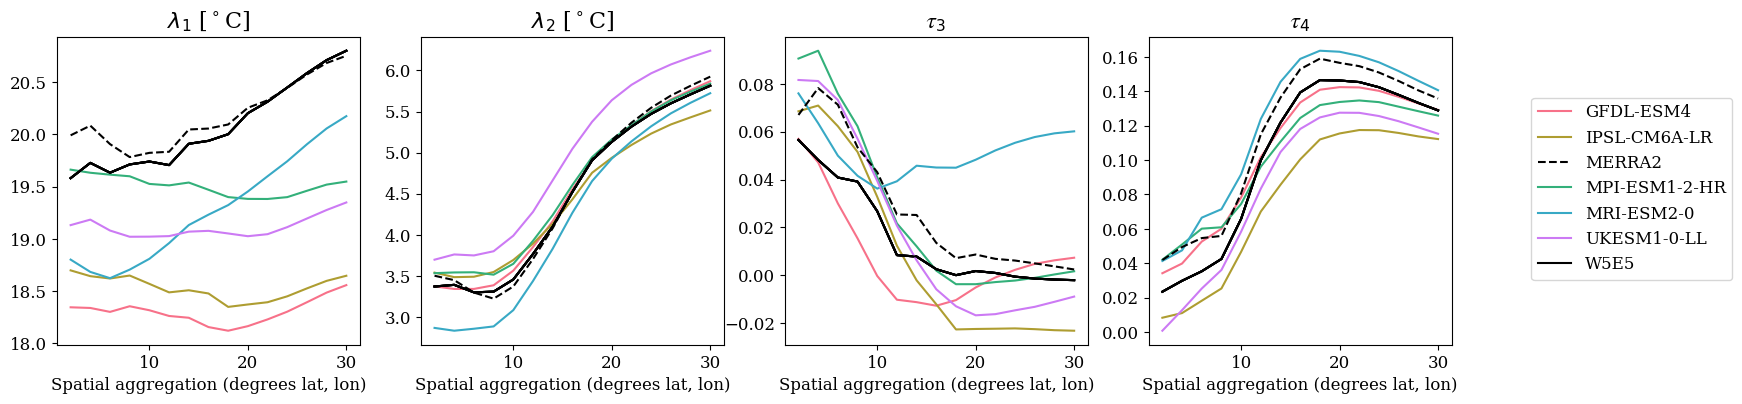

In [101]:
Lmom_names = ['$\lambda_1$', '$\lambda_2$', '$𝜏_3$', '$𝜏_4$']

nr=1
nc = len(Lmom_names)
fig, ax = plt.subplots(nrows=1, ncols=nc, figsize=(18,4))
model_colours = sns.color_palette('husl', len(models_list))

for i, lmom in enumerate(Lmom_names):
    units = ['[$^\circ$C]','[$^\circ$C]','','']
    plot_title = '{} {}'.format(Lmom_names[i], units[i])
    for k, model in enumerate(models_list):
        if i == 0:
            ax[i].plot(labels, Lmoms[lmom][q][model]-K, c=model_colours[k], label=model)
            ax[i].plot(labels, Lmoms_ref[lmom][q]-K, c='k', label = reference)
        else: 
            ax[i].plot(labels, Lmoms[lmom][q][model], c=model_colours[k], label=model)
            ax[i].plot(labels, Lmoms_ref[lmom][q], c='k', label = reference)

    if i == 0:
        ax[i].plot(labels, Lmoms[lmom][q][ad_reference]-K, c='k', label = ad_reference, ls='--')

    else:
        ax[i].plot(labels, Lmoms[lmom][q][ad_reference], c='k', label = ad_reference, ls='--')

    if sp_temp=='spatial':
        ax[i].set_xlabel('Spatial aggregation (degrees lat, lon)')
    elif sp_temp=='temporal':
        ax[i].set_xlabel('Temporal aggregation (days)')

    ax[i].set_title(plot_title, fontsize=16)


legend_lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
legend_lines, legend_labels = [sum(l, []) for l in zip(*legend_lines_labels)]
unique_legend_labels = sorted(set(legend_labels))
legend_dict = dict(zip(legend_labels, legend_lines))
unique_legend_lines = [legend_dict[x] for x in unique_legend_labels]

fig.legend(unique_legend_lines, unique_legend_labels, loc = 'center', bbox_to_anchor=(1,0.5))